# Adversarial Robustness Toolbox - Scikit Learn

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
X = data.data
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y = data.target
y[0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int32

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
data_min, data_max = X.min(), X.max()
data_min, data_max

(0.0, 1.0)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
X_train[0:10, :]

array([[0.08333333, 0.66666667, 0.        , 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.66666667, 0.45833333, 0.57627119, 0.54166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.02777778, 0.5       , 0.05084746, 0.04166667],
       [0.55555556, 0.20833333, 0.6779661 , 0.75      ],
       [0.58333333, 0.5       , 0.59322034, 0.58333333],
       [0.25      , 0.625     , 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.25      , 0.875     , 0.08474576, 0.        ]])

# Create a model

In [8]:
# from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# model = LogisticRegression(random_state=42)

model = SVC(C=1.0, kernel="rbf", max_iter=100)

# ART Attack

In [10]:
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import SklearnClassifier

In [11]:
classifier = SklearnClassifier(model=model, clip_values=(data_min, data_max))
classifier

ScikitlearnSVC(model=SVC(max_iter=100), clip_values=[0. 1.], preprocessing=StandardisationMeanStd(mean=0.0, std=1.0, apply_fit=True, apply_predict=True), preprocessing_defences=None, postprocessing_defences=None, preprocessing_operations=[StandardisationMeanStd(mean=0.0, std=1.0, apply_fit=True, apply_predict=True)], nb_classes=-1, input_shape=None, use_logits=False, kernel=<function rbf_kernel at 0x0000015D00307820>)

In [12]:
classifier.fit(X_train, y_train)

AxisError: axis 1 is out of bounds for array of dimension 1

# ART Example

In [55]:

from art.utils import load_mnist

(X_train, y_train), (X_test, y_test), min_pixel_value, max_pixel_value = load_mnist()



# Step 1a: Flatten dataset
nb_samples_train = X_train.shape[0]
nb_samples_test = X_test.shape[0]

X_train = X_train.reshape((nb_samples_train, 28 * 28))
X_test = X_test.reshape((nb_samples_test, 28 * 28))

X_train = X_train[0:100, :]
y_train = y_train[0:100, :]

classifier = SklearnClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value), use_logits = True)


classifier.fit(X_train, y_train)
classifier

ScikitlearnSVC(model=SVC(max_iter=100), clip_values=[0. 1.], preprocessing=StandardisationMeanStd(mean=0.0, std=1.0, apply_fit=True, apply_predict=True), preprocessing_defences=None, postprocessing_defences=None, preprocessing_operations=[StandardisationMeanStd(mean=0.0, std=1.0, apply_fit=True, apply_predict=True)], nb_classes=10, input_shape=(784,), use_logits=False, kernel=<function rbf_kernel at 0x0000015D00307820>)

In [56]:
y_train.shape

(100, 10)

## Evaluation over benign test example

In [52]:
predictions = classifier.predict(X_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

Accuracy on benign test examples: 65.59%


## Generate adversarial test examples

In [33]:
attack = FastGradientMethod(estimator = classifier, eps=0.2)
x_test_adv = attack.generate(x = X_test)

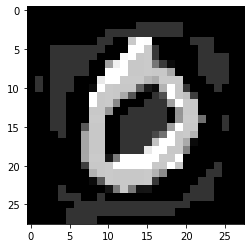

In [39]:
import matplotlib.pyplot as plt

img = x_test_adv[3]

pixels = img.reshape((28, 28))

# Plot
plt.imshow(pixels, cmap='gray')
plt.show()

# Evaluate the ART classifier on adversarial test examples

In [40]:
predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Accuracy on adversarial test examples: 40.33%


# Another Example

In [86]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
X = MinMaxScaler().fit_transform(X)
y = digits.target

min_pixel_value, max_pixel_value = X.min(), X.max()

In [87]:
y = y.reshape(-1, 1)
y.shape

(1797, 1)

In [89]:
y[0:13]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9],
       [0],
       [1],
       [2]])

In [90]:
from sklearn.preprocessing import OneHotEncoder

y = OneHotEncoder(sparse = False).fit_transform(y)
y.shape

(1797, 10)

In [91]:
y[0:13]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [74]:
model = SVC(C=1.0, kernel="rbf", max_iter=1000)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

classifier = SklearnClassifier(model=model, clip_values=(X.min(), X.max()))

classifier.fit(X_train, y_train)

In [76]:
predictions = classifier.predict(X_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

Accuracy on benign test examples: 98.33333333333333%


In [77]:
attack = FastGradientMethod(estimator = classifier, eps=0.2)
x_test_adv = attack.generate(x = X_test)

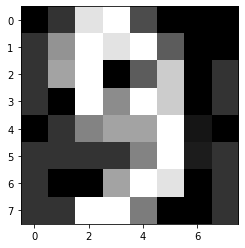

In [84]:
img = x_test_adv[1]

pixels = img.reshape((8, 8))

# Plot
plt.imshow(pixels, cmap='gray')
plt.show()

In [85]:
predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Accuracy on adversarial test examples: 48.333333333333336%


# Iris Dataset

In [97]:
data = load_iris(as_frame = True)

X = data.data
X = MinMaxScaler().fit_transform(X)
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [100]:
y = data.target
y = OneHotEncoder(sparse = False).fit_transform(y.values.reshape(-1, 1))
y[0:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [104]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

classifier = SklearnClassifier(model=model, clip_values=(X.min(), X.max()))
classifier.fit(X_train, y_train)

In [108]:
predictions = classifier.predict(X_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

Accuracy on benign test examples: 96.66666666666667%


In [110]:
attack = FastGradientMethod(estimator = classifier, eps=0.2)
x_test_adv = attack.generate(x = X_test)

predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Accuracy on adversarial test examples: 26.666666666666668%


In [114]:
pd.DataFrame(x_test_adv).head()

,0,1,2,3
0,0.700000,0.533333,0.827119,0.658333
1,0.588889,0.550000,0.318644,0.283333
2,0.744444,0.050000,0.800000,0.716667
3,0.672222,0.575000,0.793220,0.783333
4,0.894444,0.533333,0.844068,0.741667


In [115]:
pd.DataFrame(X_test).head()

,0,1,2,3
0,0.500000,0.333333,0.627119,0.458333
1,0.388889,0.750000,0.118644,0.083333
2,0.944444,0.250000,1.000000,0.916667
3,0.472222,0.375000,0.593220,0.583333
4,0.694444,0.333333,0.644068,0.541667
